# Predict activity
### A notebook for predicting the activity of a set of compounds
## Instructions
1. Define the name of the file that contains the serialized model
2. Define the subset of descriptors that will be used as input data for the model    
    1. Each model has its fixed set of descriptors
    2. You can find it on the "Finding the best subset" section in the [ML_results.ipynb](https://github.com/caiocrocha/COVID-19/blob/master/SARS-CoV-2/postera.ai/ML_results.ipynb) notebook
3. Define the name of the file that contains the compounds. Each molecule must...
    1. ...be identified by "CID"
    2. ...have an activity label (active or inactive)
    3. ...have values for the descriptors defined by "subset" (see Topic 2)
    
## How it works
The model has already been trained and serialized to a pickle file, which will be read. The model will then be loaded and receive as input the activity data and values of molecular descriptors for a set of compounds. Finally, the model will predict the activity of those compounds based on the data it has been previously trained on. 

## Table of contents
1. [Defining variables and file names](#defining)
2. [Load model and input data](#load)
3. [Model prediction](#predictions)
4. [Confusion matrix](#confusion)
5. [ROC curve](#roc)

In [1]:
import pickle
import pandas as pd

<a id='defining'></a>
## Defining variables and file names

In [2]:
model_name = 'XGBClassifier'
subset = ['NumRotatableBonds', 'TPSA', 'LabuteASA']
activity_label = 'f_activity'
compounds = 'X_test.csv'

<a id='load'></a>
## Load model and input data

In [3]:
with open(f'pickle/{model_name}.pickle', 'rb') as file:
    model_fitted = pickle.load(file)

In [4]:
data = pd.read_csv(compounds)
data.head()

,CID,f_activity,NumRotatableBonds,NumHAcceptors,NumHDonors,TPSA,LabuteASA,MolLogP,qvina,rfscore_qvina,plants,rfscore_plants
0,DAN-LON-a5fc619e-10,0,5,2,0,23.55,158.689925,3.83430,-7.2,6.891915,-85.6419,6.865601
1,LON-WEI-0a73fcb8-5,0,2,3,0,42.43,138.168458,3.91750,-7.1,6.561454,-77.0376,6.811580
2,LON-WEI-ff7b210a-2,0,4,6,0,94.31,153.644109,3.37040,-8.1,6.570770,-69.4571,6.629806
3,TRY-UNI-714a760b-12,1,2,2,2,54.02,110.002542,3.68742,-5.3,5.689923,-44.5084,5.560252
4,LON-WEI-b8d98729-32,0,6,4,1,75.19,166.250236,3.77500,-6.3,7.307091,-78.2027,7.283732


<a id='predictions'></a>
## Model predictions

In [5]:
X_test = data[subset]
y_test = data[activity_label]

y_pred = model_fitted.predict(X_test)

In [6]:
y_test.value_counts()

0    101
1     25
Name: f_activity, dtype: int64

In [7]:
y_pred = pd.Series(y_pred, name='predictions')
y_pred.value_counts()

0    73
1    53
Name: predictions, dtype: int64

In [8]:
for i in y_test.index:
    print(f'{data.iloc[i]["CID"]}')
    print(f'Activity: {y_test[i]}\tPrediction: {y_pred[i]}')

DAN-LON-a5fc619e-10
Activity: 0	Prediction: 1
LON-WEI-0a73fcb8-5
Activity: 0	Prediction: 1
LON-WEI-ff7b210a-2
Activity: 0	Prediction: 0
TRY-UNI-714a760b-12
Activity: 1	Prediction: 0
LON-WEI-b8d98729-32
Activity: 0	Prediction: 0
JAG-UCB-ef2c0e8e-8
Activity: 0	Prediction: 0
WAR-XCH-79d12f6e-4
Activity: 1	Prediction: 0
EDJ-MED-c9f55a56-1
Activity: 0	Prediction: 0
VIR-GIT-7b3d3065-3
Activity: 0	Prediction: 1
RAL-MED-2de63afb-10
Activity: 0	Prediction: 0
BAR-COM-4e090d3a-47
Activity: 0	Prediction: 0
WAR-XCH-b72a1bbc-11
Activity: 0	Prediction: 0
TRY-UNI-1fd04853-7
Activity: 0	Prediction: 0
DAR-DIA-23aa0b97-11
Activity: 0	Prediction: 0
TAM-UNI-d1c3dd9f-18
Activity: 0	Prediction: 0
LOR-NOR-30067bb9-12
Activity: 0	Prediction: 1
AAR-POS-8a4e0f60-4
Activity: 0	Prediction: 1
JOH-UNI-c7afdb96-2
Activity: 0	Prediction: 0
MAT-POS-590ac91e-1
Activity: 0	Prediction: 0
MAK-UNK-d4768348-1
Activity: 1	Prediction: 1
DAR-DIA-23aa0b97-19
Activity: 1	Prediction: 1
PAT-UNK-b2d83456-1
Activity: 0	Prediction: 0


<a id='confusion'></a>
## Confusion matrix

In [9]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
matrix = pd.DataFrame(conf_matrix)
matrix

,0,1
0,0.663366,0.336634
1,0.240000,0.760000


<a id='roc'></a>
## ROC curve

Text(0.5, 1.0, 'Receiver Operating Characteristic')

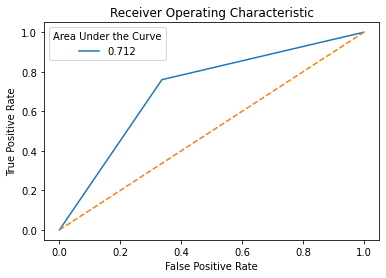

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'{auc(fpr, tpr):>.3f}')

plt.plot([0,1], [0,1], linestyle='--')
plt.legend(title='Area Under the Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')